# Analysis of reviews and their relationship with the prices

There are so many factors which contributes towards the price of a listing on AirBnB.While, we already have few conclusions for relationship between various factors and their dependency on prices of a listing,lets analyze if price of a listing dependent upon number of reviews and if yes, how does it varies?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
reviewsDF = pd.read_csv("../data/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


#### Assigning polarity score to each comment and adding the same to dataframe

To retrieve the polarity of comments i.e. whether the comment is 'positive','negative' or 'neutral' we are using built-in analyzer in the NLTK Python library to assign polarity score to each comment.

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])
reviewsDF.head()

C:\Users\chait\Anaconda3.7\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n","{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...",0.000,0.543,0.457,0.5520
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...,"{'neg': 0.038, 'neu': 0.595, 'pos': 0.367, 'co...",0.038,0.367,0.595,0.9788
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",0.000,0.260,0.740,0.9700
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...,"{'neg': 0.025, 'neu': 0.654, 'pos': 0.321, 'co...",0.025,0.321,0.654,0.9882
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.000,0.277,0.723,0.9322


In [3]:
reviewsDF.to_csv('pority_Values_reviews.csv')

As our dataframe contains reviews in different language, remove the comments which are not in english

In [4]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)
#     print(lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n","{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...",0.000,0.543,0.457,0.5520,en
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...,"{'neg': 0.038, 'neu': 0.595, 'pos': 0.367, 'co...",0.038,0.367,0.595,0.9788,en


#### Visualizing the polarity score for positivity

In [5]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,7499,0.0,positive
1,48237,0.1,positive
2,113341,0.2,positive
3,124141,0.3,positive
4,86859,0.4,positive


#### Visualizing polarity score for negativity

In [6]:

polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,81878,0.0,negative
1,9790,0.1,negative
2,1441,0.2,negative
3,358,0.3,negative
4,156,0.4,negative


#### Visualizing polarity score for neutrality

In [7]:
polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\chait\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,count_of_Comments,RANGE,Sentiment
0,231,0.0,neutrl
1,7227,0.1,neutrl
2,16998,0.2,neutrl
3,28665,0.3,neutrl
4,53515,0.4,neutrl


#### Plotting the number of comments against the polarity range

C:\Users\chait\Anaconda3.7\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

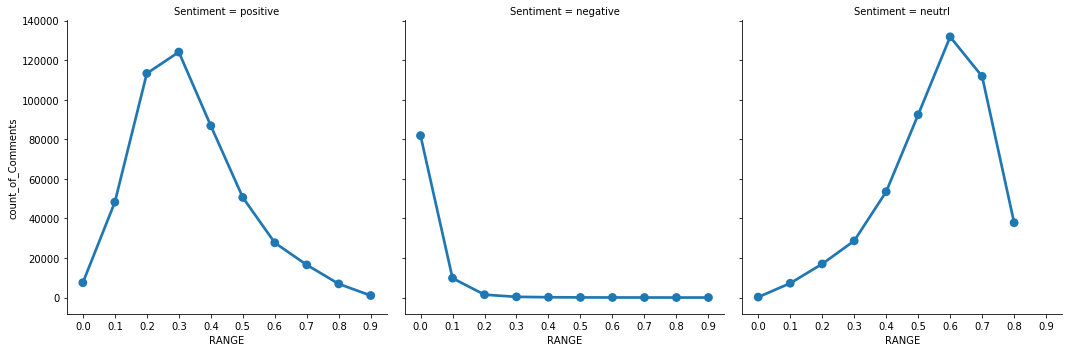

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment") 


If observed, it can be seen , from the above graphs, that most of the comments have 0.0 negative polarity. And the comments are mostly neutral and only some are positive.

### Interpreting the relation between number of reviews and prices

C:\Users\chait\Anaconda3.7\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0,0.5,'Number of reviews')

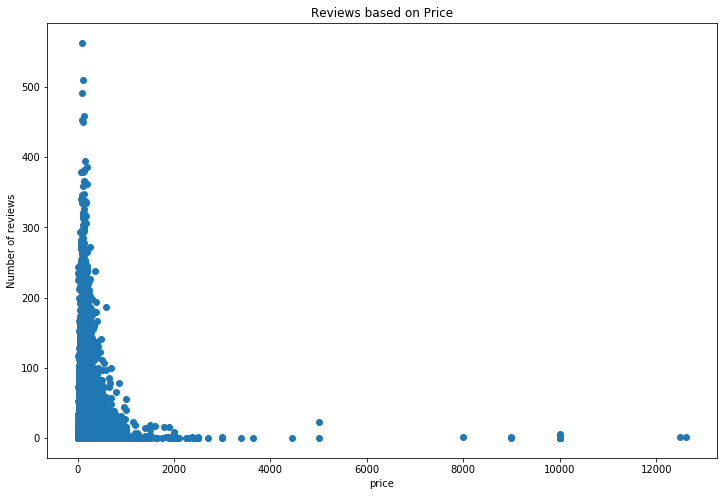

In [9]:
inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

From the graph, the reviews were most observed for the listings that have a price range around $100 - 800. The number quickly declines as the price goes up. <br>
It shows that, there is no necessity for an expensive listing to have more reviews. <br>
Hence, the Prices have no relation with the Number of reviews.

#### Analyzing the most used words in the comments

In [10]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in EngReviewsDF.iterrows():
    words += row['comments']

In [11]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'!',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [12]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

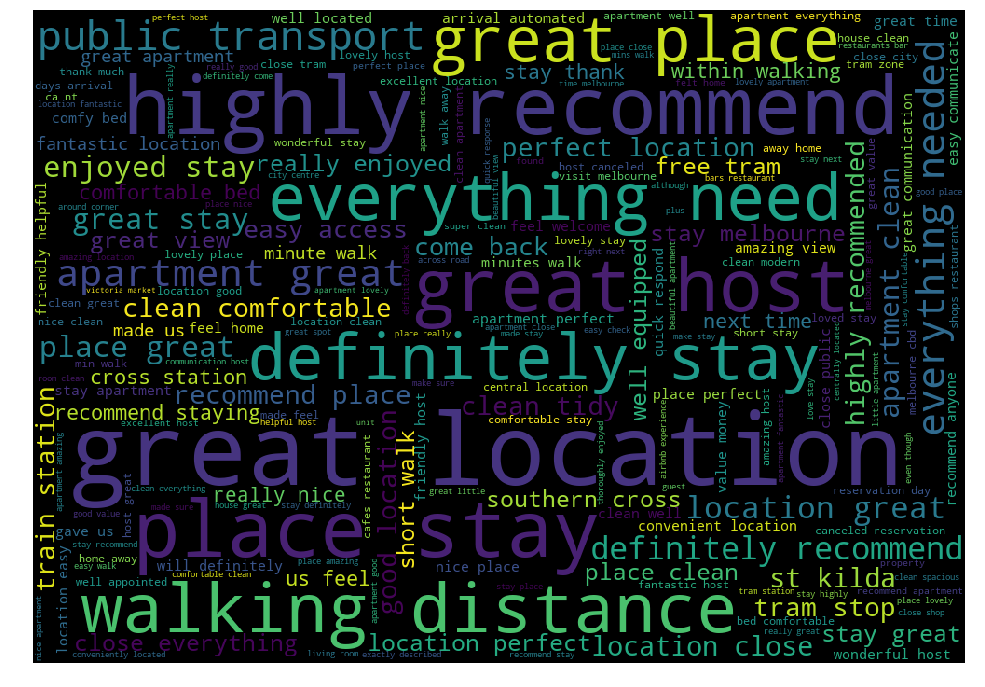

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that the most used words are "great location", "clean", "comfortable" and "highly recommended".All these reviews and comments plays a big role in attracting the attention of travellers and if there are comments such as "highly recommended" then travellers surely takes a look at the listing.